In [1]:
%%capture --no-stderr
pip install --quiet -U langchain_openai langchain_core langgraph

In [2]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(content=f"So you said you are learning langgraph?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Prasanth"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn building ai agents using langgraph and llm", name="Prasanth"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you are learning langgraph?
================================ Human Message =================================
Name: Prasanth

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Prasanth

I want to learn building ai agents using langgraph and llm


In [3]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [5]:
result

AIMessage(content="That's an exciting area to dive into! LangGraph and Large Language Models (LLMs) can be powerful tools for building AI agents. Here's a general roadmap to help you get started:\n\n1. **Understand the Basics**:\n   - **LangGraph**: Familiarize yourself with what LangGraph is and how it interacts with language models. LangGraph could be a framework or tool that provides a structured way to work with language models, although I don't have specific details about it. Check for any official documentation or resources.\n   - **LLMs**: Learn about large language models like GPT-3, GPT-4, and others. Understand their capabilities, limitations, and how they process and generate language.\n\n2. **Set Up Your Environment**:\n   - Ensure you have the necessary software and hardware to run LLMs. This might include Python, specific libraries (such as transformers from Hugging Face), and potentially access to cloud resources if you're working with very large models.\n\n3. **Learn Ab

In [6]:
print(result.response_metadata)

{'token_usage': {'completion_tokens': 617, 'prompt_tokens': 68, 'total_tokens': 685, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_5f20662549', 'finish_reason': 'stop', 'logprobs': None}


In [7]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

In [17]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Prasanth")])
tool_call

"""
Language Model + Tool Prompting
Under the hood, LangChain constructs a specialized prompt that describes all available tools to the LLM. This prompt includes:

The name of the function (multiply)
The function’s docstring ("Multiply a and b.\n\n Args:\n a: first int\n b: second int")
The function signature (which indicates it takes two integers and returns an integer)
Natural Language to Structured Function Call
When you pass the user’s message ("What is 2 multiplied by 3") to llm_with_tools.invoke(...), LangChain includes in the prompt something along the lines of:

“You have these tools:
Tool name: multiply
Description: Multiply a and b.
Signature: (a: int, b: int) -> int
Decide if you need to call this tool based on the user’s query. If you call the tool, produce a structured JSON with the tool name and arguments.”

LLM Reasoning
The LLM “reads” the user’s request—“What is 2 multiplied by 3?”—and recognizes that:

It’s a straightforward math operation.
The prompt has told it about a multiply(a, b) tool that does exactly that.
So the LLM produces a tool call (in a special format behind the scenes) that says something like:
json
Copy code
{
  "tool_name": "multiply",
  "arguments": {
    "a": 2,
    "b": 3
  }
}
This is typically not something you see directly; it happens internally.

Execution of the Tool
LangChain then parses that tool call JSON, sees that it corresponds to multiply(2, 3), and executes the Python function multiply(a=2, b=3)."""

'\nLanguage Model + Tool Prompting\nUnder the hood, LangChain constructs a specialized prompt that describes all available tools to the LLM. This prompt includes:\n\nThe name of the function (multiply)\nThe function’s docstring ("Multiply a and b.\n\n Args:\n a: first int\n b: second int")\nThe function signature (which indicates it takes two integers and returns an integer)\nNatural Language to Structured Function Call\nWhen you pass the user’s message ("What is 2 multiplied by 3") to llm_with_tools.invoke(...), LangChain includes in the prompt something along the lines of:\n\n“You have these tools:\nTool name: multiply\nDescription: Multiply a and b.\nSignature: (a: int, b: int) -> int\nDecide if you need to call this tool based on the user’s query. If you call the tool, produce a structured JSON with the tool name and arguments.”\n\nLLM Reasoning\nThe LLM “reads” the user’s request—“What is 2 multiplied by 3?”—and recognizes that:\n\nIt’s a straightforward math operation.\nThe promp

In [9]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is the product of 2 & 3", name="Prasanth")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_h3BZlguPk6o6ILvptJ5wCMfV', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 66, 'total_tokens': 84, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_e161c81bbd', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3e2fa8a7-cb53-45c6-93a4-147db734fb3c-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_h3BZlguPk6o6ILvptJ5wCMfV', 'type': 'tool_call'}], usage_metadata={'input_tokens': 66, 'output_tokens': 18, 'total_tokens': 84, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is the sum of 2 & 3", name="Prasanth")])
tool_call

AIMessage(content='The sum of 2 and 3 is 5.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 66, 'total_tokens': 80, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_d28bcae782', 'finish_reason': 'stop', 'logprobs': None}, id='run-405d352a-450e-4a7e-a5ac-68e521b73e59-0', usage_metadata={'input_tokens': 66, 'output_tokens': 14, 'total_tokens': 80, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [12]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

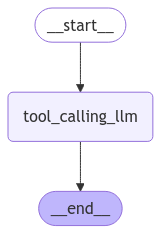

In [13]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_edge(START,"tool_calling_llm")
builder.add_edge("tool_calling_llm",END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
messages =  graph.invoke({"messages":HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! How can I assist you today?


In [15]:
messages =  graph.invoke({"messages":HumanMessage(content="What is the sum of 2 and 3?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the sum of 2 and 3?
================================== Ai Message ==================================

The sum of 2 and 3 is 5.


In [16]:
messages =  graph.invoke({"messages":HumanMessage(content="Multiply 2 & 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 & 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BS9LuR2VE4whzs95YVu3b3Q8)
 Call ID: call_BS9LuR2VE4whzs95YVu3b3Q8
  Args:
    a: 2
    b: 3
